**PyTorch** идет предустановленным в Google Colab, просто импортируем

In [ ]:
import torch
import numpy as np

**Матричное умножение** - операция над матрицами, где результирующая матрица составлена скалярными произведениями строк и рядов

**Скалярное произведение** двух векторов - сумма произведений элементов в соответствующих позициях этих векторов

In [ ]:
v1 = np.array([1, 2])
v2 = np.array([3, 4])
np.dot(v1, v2)

11

In [ ]:
t1 = torch.Tensor([[1, 2], [3, 4]])
t2 = torch.ones(2, 2) * 2
print(t1)
print(t2)

tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 2.],
        [2., 2.]])


теперь умножим эти две матрицы операцией **@** (аналог - torch.**matmul**())

In [ ]:
t1 @ t2

tensor([[ 6.,  6.],
        [14., 14.]])

**Задание**: вычислить выражение

**Дано**: 2 матричных тензора **t1** и **t2**

In [ ]:
t1 = torch.stack([torch.Tensor([1, 1, 1, 1]) * n for n in range(1, 5)])
t2 = t1.transpose(-1, -2)
print(t1)
print(t2)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.]])
tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])


**1**) Вычислить выражение **t3** = t1 ** 2 - t2 * 2 + t1 * 4

2) Сделать конкатенацию тензоров **t2** и **t3**, записать в тензор **t4** (должна получиться размерность 4 строки и 8 столбцов) 

Конкатенация - операция, в которой результирующая матрица составлена из рядов первой и второй матрицы, если конкатенация идет вдоль столбцов, или из столбцов первой и второй матрицы, если конкатенация идет вдоль строк. 

Делается оператором **torch.cat**(tensors, dim), где

**tensors** - список исходных тензоров

**dim** - измерение, вдоль которого делается конкатенация, 0 - вдоль столбцов, 1 - вдоль строк



3) Посчитать скалярное произведение **первой** и **последней** строки матрицы тензора **t4**

Делаем полноценный скрипт для обучения нейросети, это будет нейросеть для задачи линейной регрессии

Сгенерируем наши исходные данные

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Для начала определимся с тем, где будут жить наши тензоры: на GPU или CPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Сгенерируем исходные данные для линейной регрессии

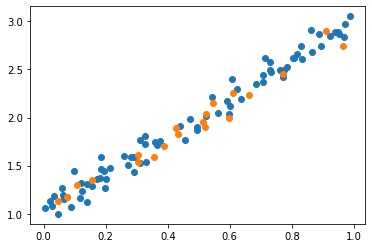

In [ ]:
np.random.seed(42)
data_size = 100

x = np.random.rand(data_size, 1)
y = 1 + 2 * x + .1 * np.random.randn(data_size, 1)

# Перемешаем индексы
idx = np.arange(data_size)
np.random.shuffle(idx)

# Возьмем первые 80% для тренировки
margin = int(data_size * 0.8)
train_idx = idx[:margin]
# оставшиеся 20% для валидации
val_idx = idx[margin:]

# Соберем датасеты
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

plt.plot(x_train, y_train, 'o')
plt.plot(x_val, y_val, 'o')

Определим гиперпараметры: количество эпох и шаг обучения. Зафиксируем генератор случайных чисел в PyTorch

In [ ]:
lr = 1e-1
n_epochs = 1000
torch.manual_seed(42)

Создадим тензоры для исходных данных

In [ ]:
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

Создадим тензоры для параметров регрессии **а** и **b**. Инициализируем их случайными значениями

Обратите внимание на параметр **requires_grad**=**True**, таким образом мы сообщаем PyTorch, что он должен менять эти значения

In [ ]:
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a

tensor([-0.5187], device='cuda:0', requires_grad=True)

Собственно, цикл обучения

In [ ]:
import torch.optim as optim

# Оптимизатор будет обновлять параметры
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    # Считаем целевую переменную yhat
    yhat = a + b * x_train_tensor
    # Считаем ошибку
    error = y_train_tensor - yhat
    # Считаем лосс
    loss = (error ** 2).mean()

    # Здесь считается градиент для каждого тензора (а и b) и записывается в параметры a и b
    loss.backward()     
    
    # Обновляем параметры. Обязательно делать это в режиме no_grad()
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # Обнуляем градиенты
    optimizer.zero_grad()
    
print(f'a = {a.item()}, b = {b.item()}')

a = 1.023543119430542, b = 1.9689600467681885


# TF в Colab

In [0]:
%config IPCompleter.greedy=True  # более лучший автокомплит

In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

1.13.0-rc1


In [3]:
tf.reset_default_graph()
a = tf.placeholder(tf.float32, (2, 2))
b = tf.Variable(tf.ones((2, 2)))
c = a @ b

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
print(c)

Tensor("matmul:0", shape=(2, 2), dtype=float32)


In [5]:
print(list(tf.get_default_graph().get_operations()[-1].inputs))
print(list(tf.get_default_graph().get_operations()[-1].outputs))

[<tf.Tensor 'Placeholder:0' shape=(2, 2) dtype=float32>, <tf.Tensor 'Variable/read:0' shape=(2, 2) dtype=float32>]
[<tf.Tensor 'matmul:0' shape=(2, 2) dtype=float32>]


In [0]:
s = tf.InteractiveSession()

In [12]:
s.run(tf.global_variables_initializer())
s.run(c, feed_dict={a: np.ones((2, 2))})

array([[2., 2.],
       [2., 2.]], dtype=float32)

In [0]:
s.close()

# Оптимизация

In [0]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype=tf.float32, trainable=True)
f = x ** 2

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f, var_list=[x])

In [17]:
tf.trainable_variables()

[<tf.Variable 'x:0' shape=() dtype=float32_ref>]

In [18]:
with tf.Session() as s:  # сессия сама закроется
    s.run(tf.global_variables_initializer())
    for i in range(10):
        _, curr_x, curr_f = s.run([step, x, f])
        print(curr_x, curr_f)

-0.5737303 0.5143226
-0.45898423 0.32916644
-0.36718738 0.21066652
-0.2937499 0.13482657
-0.23499992 0.086289
-0.18799993 0.055224966
-0.15039995 0.035343975
-0.12031996 0.022620145
-0.09625597 0.0144768935
-0.077004775 0.009265212


# TensorBoard логирование

In [0]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype=tf.float32)
f = x ** 2

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f)

In [0]:
tf.summary.scalar('curr_x', x)
tf.summary.scalar('curr_f', f)
summaries = tf.summary.merge_all()

In [0]:
with tf.Session() as s:
  summary_writer = tf.summary.FileWriter("logs/1", s.graph)
  s.run(tf.global_variables_initializer())
  for i in range(10):
      _, curr_summaries = s.run([step, summaries])
      summary_writer.add_summary(curr_summaries, i)
      summary_writer.flush()

Локально можно запустить  `tensorboard --logdir=./logs` в консоли.

А вот так можно запустить прямо в Google Colab:

In [0]:
! wget https://raw.githubusercontent.com/ZEMUSHKA/skillfactory-dl/master/setup_google_colab.py -O setup_google_colab.py -q
import setup_google_colab

# запускаем сервер tensorboard в фоне
import os
os.system("tensorboard --logdir=./logs --host 0.0.0.0 --port 6006 &")

# открываем порт из Google Colab
setup_google_colab.expose_port_on_colab(6006)

# Обучение линейной модели

In [93]:
# модельные данные
N = 1000
D = 3
x = np.random.random((N, D))
w = np.random.random((D, 1))
y = x @ w + np.random.randn(N, 1) * 0.20

print(x.shape, y.shape)
print(w.T)

(1000, 3) (1000, 1)
[[0.58814689 0.78643231 0.79772526]]


In [94]:
tf.reset_default_graph()

features = tf.placeholder(tf.float32, shape=(None, D), name="features")
target = tf.placeholder(tf.float32, shape=(None, 1), name="target")

weights = tf.get_variable("weights", shape=(D, 1), dtype=tf.float32)
predictions = features @ weights


loss = tf.reduce_mean((target - predictions) ** 2, name="loss")

print(target.shape, predictions.shape, loss.shape)

(?, 1) (?, 1) ()


In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(loss)

In [0]:
# производные это часть графа
tf.get_default_graph().get_operations()

In [36]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for i in range(300):
        _, curr_loss, curr_weights = s.run([step, loss, weights], 
                                           feed_dict={features: x, target: y})
        if i % 50 == 0:
            print(curr_loss)

1.9895532
0.06145981
0.046104774
0.0433546
0.042860366
0.04277123


In [37]:
# результат обучения
curr_weights.T

array([[0.79846495, 0.57642007, 0.56647074]], dtype=float32)

In [38]:
# правильные веса
w.T

array([[0.7692187 , 0.59123648, 0.56121469]])

# Обучение в Keras

In [41]:
import keras
import keras.models as M
import keras.layers as L
import keras.backend as K
print(keras.__version__)

2.2.4


In [85]:
K.clear_session()  # очищает граф и перезапускает сессию

model = M.Sequential()
model.add(L.Dense(1, use_bias=False, input_shape=(D,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [87]:
model.fit(x, y, batch_size=8, epochs=10, callbacks=[keras.callbacks.TensorBoard("./logs/keras")])

Epoch 1/10
1000/1000 [==============================] - 0s 121us/step - loss: 1.4677 - mean_squared_error: 1.4677
Epoch 2/10
1000/1000 [==============================] - 0s 90us/step - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 3/10
1000/1000 [==============================] - 0s 92us/step - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 4/10
1000/1000 [==============================] - 0s 88us/step - loss: 0.0488 - mean_squared_error: 0.0488
Epoch 5/10
1000/1000 [==============================] - 0s 113us/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 6/10
1000/1000 [==============================] - 0s 87us/step - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 7/10
1000/1000 [==============================] - 0s 91us/step - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 8/10
1000/1000 [==============================] - 0s 87us/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 9/10
1000/1000 [==============================] - 0s 89us/step - loss: 0.0435 - mean_squ

In [88]:
s = K.get_session()
s.run(model.weights)

[array([[0.757604 ],
        [0.6322889],
        [0.5464471]], dtype=float32)]